In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# **Trial-by-trial Analysis of SCR-ROI response for shock**

In [2]:
import pandas as pd
import numpy as np
import os
from os.path import join, isdir, dirname, basename, exists
from os import mkdir
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.5)

cmap = plt.get_cmap('Set1')

In [3]:
eCON = '/data/bswift-1/Pessoa_Lab/eCON'
SCR_betapath = join(eCON,'SCR_new/dataset/results_ShockUncensored/{subj}/{group}lable/splitted_regs/noProx/buttonPress/shock_IM/{subj}_bucket_LSS.1D')
roi_betapath = join(eCON,'dataset/results_ShockUncensored/{subj}/{group}lable/splitted_regs/ROI_analysis/noProx/buttonPress/shock_IM/{subj}_betas_3dLSS.1D')
yoked = pd.read_excel(join(eCON,'SCR_new/scripts/CON_yoked_table.xlsx'))
yoked = yoked.query('use == 1')

In [4]:
rois = 'rBNST lBNST rdAI rvAI vmPFC PCC1 rPAG lPAG PCC2 ldAI\
        lvAI rPI lPI rCa lCa rPa lPa rVS lVS Amygdala_BLBM_La_L\
        Amygdala_BLBM_La_R Amygdala_CeME_L Amygdala_CeME_R ACC'.split()

24

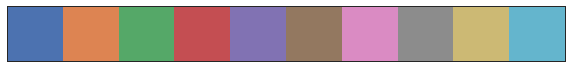

In [5]:
pal = sns.color_palette()
sns.palplot(pal)
len(rois)

In [6]:
if not exists('data/ROIs_SCR_trial_by_trial.txt'):
    df = pd.DataFrame()
    for i, row in yoked.iterrows():
        for kind in ['control','uncontrol']:
            scr_beta = np.loadtxt(SCR_betapath.format(subj=row[kind],group=kind))
            roi_beta = np.loadtxt(roi_betapath.format(subj=row[kind],group=kind)).T
            all_betas = np.concatenate((scr_beta[:,None],roi_beta),axis=1)

            tmp_df = pd.DataFrame(all_betas,columns=['SCR']+rois)
            tmp_df['SubjID'] = row[kind]
            tmp_df['Group'] = kind
            tmp_df['Pair'] = 'P{:02d}'.format(i)
            df = pd.concat([df,tmp_df],axis =0)
            
    df.to_csv('data/ROIs_SCR_trial_by_trial.txt',sep='\t',index=False,float_format='%.4f')
else:
    df = pd.read_csv('data/ROIs_SCR_trial_by_trial.txt',sep='\t')

In [114]:
df.groupby('SubjID')['SCR'].count().sort_values()

SubjID
CON060    16
CON077    16
CON085    17
CON071    17
CON105    17
CON110    17
CON001    20
CON031    20
CON066    20
CON062    20
CON080    25
CON079    25
CON083    25
CON078    25
CON084    25
CON082    25
CON076    25
CON072    25
CON074    25
CON073    25
CON069    25
CON068    25
CON067    25
CON065    25
CON064    25
CON063    25
CON061    25
CON075    25
CON086    25
CON087    25
          ..
CON027    25
CON028    25
CON029    25
CON055    25
CON054    25
CON053    25
CON052    25
CON051    25
CON050    25
CON049    25
CON048    25
CON047    25
CON046    25
CON045    25
CON044    25
CON043    25
CON042    25
CON041    25
CON040    25
CON039    25
CON038    25
CON037    25
CON036    25
CON035    25
CON034    25
CON033    25
CON032    25
CON030    25
CON118    25
CON119    25
Name: SCR, Length: 114, dtype: int64

## **SCR response distributions of the two groups**
- Compare the distributions
    - Two (Independent) Sample Test
    - Related Sample Test

### **Two (Independent) Sample Test**

$$H_{0}:\mu_{SCR_{uncontrol}} \neq \mu_{SCR_{control}}$$

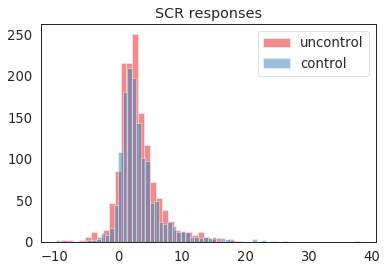

In [11]:
uncon_scr = df[df['Group']=='uncontrol']['SCR'].values
con_scr = df[df['Group']=='control']['SCR'].values

_=plt.hist(uncon_scr,bins=50,alpha=0.5,color=cmap.colors[0],label='uncontrol')
_=plt.hist(con_scr,bins=50,alpha=0.5,color=cmap.colors[1],label='control')
_=plt.title('SCR responses')
_=plt.legend()

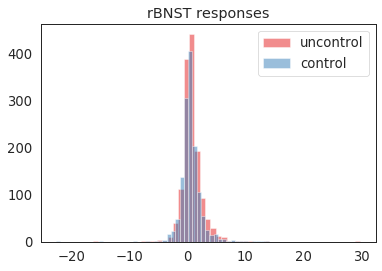

In [12]:
uncon_rBNST = df[df['Group']=='uncontrol']['rBNST'].values
con_rBNST = df[df['Group']=='control']['rBNST'].values

_=plt.hist(uncon_rBNST,bins=50,alpha=0.5,color=cmap.colors[0],label='uncontrol')
_=plt.hist(con_rBNST,bins=50,alpha=0.5,color=cmap.colors[1],label='control')
_=plt.title('rBNST responses')
_=plt.legend()

# **Plot: ROI vs. SCR shock response**

In [13]:
def plot_SCR_ROI_corr(roi):
    fig = plt.figure(figsize=(6,5))
    sns.regplot('SCR',roi,df[df['Group']=='control'],color=cmap.colors[1],
                scatter_kws= {'edgecolors':'black','s':50,'alpha':0.5,'color':cmap.colors[1]},label='control',robust=True)
    sns.regplot('SCR',roi,df[df['Group']=='uncontrol'],color=cmap.colors[0],
                scatter_kws={'edgecolors':'black','s':50,'alpha':0.5,'color':cmap.colors[0]},label='uncontrol',robust=True)
    plt.xlabel('Skin Conductance\n[Shock] (A.U.)')
    plt.ylabel('{}\n[Shock] (A.U.)'.format(roi))
    plt.ylim([-4,6])
    plt.legend()
    #plt.title('trial by trial')
    plt.tight_layout()
    #plt.savefig(join(eCON,'scripts/tmp_preproc2/figures/{}_SCR_correlation_tbt.png').format(roi),dpi=600)

[None, None]

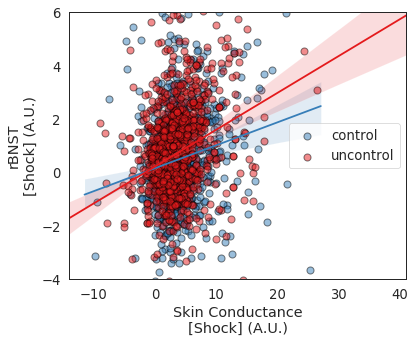

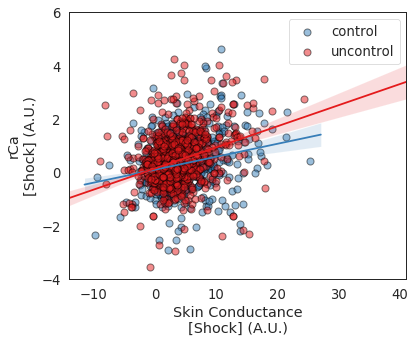

In [14]:
[plot_SCR_ROI_corr(roi) for roi in ['rBNST','rCa']]

In [15]:
df.set_index('Pair',inplace=True)
df.head()

,SCR,rBNST,lBNST,rdAI,rvAI,vmPFC,PCC1,rPAG,lPAG,PCC2,...,lPa,rVS,lVS,Amygdala_BLBM_La_L,Amygdala_BLBM_La_R,Amygdala_CeME_L,Amygdala_CeME_R,ACC,SubjID,Group
Pair,,,,,,,,,,,,,,,,,,,,,
P00,8.2416,6.5898,5.4506,0.8600,1.1731,0.9509,-1.9926,-1.6502,1.1748,1.7105,...,0.6176,2.1526,3.9509,1.2451,2.4408,-0.0842,1.9868,2.1183,CON001,control
P00,7.8895,1.1290,4.7791,2.8274,2.6400,-0.5020,-1.2532,2.1540,2.7793,-3.1726,...,0.3769,0.7421,1.0510,-2.4174,-0.4589,0.4706,-0.0530,1.7380,CON001,control
P00,3.6947,1.1735,0.1063,0.9075,0.6515,-0.2106,-1.4927,0.7701,0.6571,-2.4234,...,-0.2980,-0.1096,0.1296,0.1690,-0.1270,0.1270,0.7430,0.2092,CON001,control
P00,3.4570,3.7228,2.9658,1.4373,1.1128,-0.0861,-0.8111,0.0878,1.3392,-0.0724,...,0.6144,0.7057,1.0341,0.4287,0.3231,1.3564,-0.3556,1.0943,CON001,control
P00,10.6737,0.7982,5.6097,1.2018,1.9240,1.4299,0.2547,-1.5618,1.0689,1.8789,...,1.7126,2.1192,2.9807,-1.5646,1.8814,-0.9305,1.1966,2.4722,CON001,control


In [16]:
paired_df = df[['rBNST','SCR']][df['Group']=='uncontrol'] - df[['rBNST','SCR']][df['Group']=='control']
paired_df.rename(columns={'rBNST':'rBNST_diff','SCR':'SCR_diff'},inplace=True)
df.reset_index(inplace=True)
paired_df.head()

,rBNST_diff,SCR_diff
Pair,,
P00,-0.8355,-4.0788
P00,-7.7844,-6.1857
P00,3.3841,-2.0274
P00,-3.0017,-3.6110
P00,4.1096,-9.6232


In [17]:
paired_df.to_csv('data/uncon_v_con_rBNST_SCR.txt',sep='\t',float_format='%.4f')

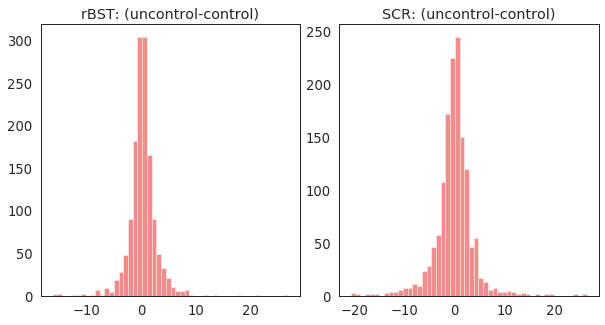

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.15)
_=plt.hist(paired_df['rBNST_diff'],bins=50,alpha=0.5,color=cmap.colors[0],label='uncontrol')
_=plt.title('rBST: (uncontrol-control)')
plt.subplot(1,2,2)
_=plt.hist(paired_df['SCR_diff'],bins=50,alpha=0.5,color=cmap.colors[0],label='uncontrol')
_=plt.title('SCR: (uncontrol-control)')

In [19]:
from scipy.stats import pearsonr, spearmanr, ttest_rel, ttest_1samp
import math

In [20]:
def ttest_SCR_roi(roi):
    con = []; uncon = []
    for i, row in yoked.iterrows():
        con_roi = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='control')][roi].values
        uncon_roi = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='uncontrol')][roi].values

        con_SCR = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='control')]['SCR'].values
        uncon_SCR = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='uncontrol')]['SCR'].values

        con_rp,_ = spearmanr(con_roi,con_SCR)
        uncon_rp,_ = spearmanr(uncon_roi,uncon_SCR)

        con_zp = math.atanh(con_rp)
        uncon_zp = math.atanh(uncon_rp)

        con.append(con_zp); uncon.append(uncon_zp)
        
    print(roi,': t = %.4f, p = %.4f' %(ttest_1samp(np.subtract(uncon,con),0)))
    

In [21]:
print([ttest_SCR_roi(roi) for roi in rois])

rBNST : t = 1.9322, p = 0.0584
lBNST : t = 1.4464, p = 0.1536
rdAI : t = -0.3112, p = 0.7568
rvAI : t = 0.1432, p = 0.8867
vmPFC : t = -0.3849, p = 0.7018
PCC1 : t = -0.3269, p = 0.7449
rPAG : t = 0.5436, p = 0.5889
lPAG : t = -1.6280, p = 0.1091
PCC2 : t = -1.9100, p = 0.0613
ldAI : t = 0.1781, p = 0.8593
lvAI : t = -0.2649, p = 0.7920
rPI : t = -0.7422, p = 0.4610
lPI : t = -0.6201, p = 0.5377
rCa : t = 1.4486, p = 0.1530
lCa : t = 0.6525, p = 0.5168
rPa : t = 0.0937, p = 0.9256
lPa : t = 0.4240, p = 0.6732
rVS : t = 0.3042, p = 0.7621
lVS : t = 0.2698, p = 0.7883
Amygdala_BLBM_La_L : t = 0.6972, p = 0.4885
Amygdala_BLBM_La_R : t = -0.9109, p = 0.3662
Amygdala_CeME_L : t = -0.2738, p = 0.7853
Amygdala_CeME_R : t = 1.2484, p = 0.2171
ACC : t = -0.2545, p = 0.8000
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


# **rBST vs. SCR correlation analysis**
1. For each participant get correlation value for ROI and SCR trial-by-trial responses.
2. Z-transform the correlation value (r)
3. Take the paired difference of the transformed correlation value

In [22]:
def get_zcorr_df(roi):
    rba_df = pd.DataFrame()
    for roi in rois:
        for i, row in yoked.iterrows():
            con_roi = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='control')][roi].values
            uncon_roi = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='uncontrol')][roi].values

            con_SCR = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='control')]['SCR'].values
            uncon_SCR = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='uncontrol')]['SCR'].values

            con_rp,_ = spearmanr(con_roi,con_SCR)
            uncon_rp,_ = spearmanr(uncon_roi,uncon_SCR)

            con_zp = math.atanh(con_rp)
            uncon_zp = math.atanh(uncon_rp)

            # Y is the difference (uncon-con) of z-transformed correlation coefficient
            tmp_df = pd.DataFrame(['P{:02}'.format(i), roi,
                                   uncon_zp-con_zp,uncon_zp,con_zp],
                                  index=['Pair','ROI','Y','uncontrol','control']).T
            rba_df = pd.concat([rba_df,tmp_df],axis=0)

    return rba_df

In [23]:
rba_df = get_zcorr_df(rois)
rba_df['Y'] = rba_df['Y'].astype(float)
rba_df['uncontrol'] = rba_df['uncontrol'].astype(float)
rba_df['control'] = rba_df['control'].astype(float)

Use the following pivot commad if you want a column for each roi
> rba_df.pivot(index='Pair',columns='ROI')

Later if you want to add covarites, setting 'Pair' column as the index would help in joining the STAI scores to the rba dataframe
> rba_df.set_index('Pair',inplace=True)

In [33]:
rba_df[rba_df['ROI']=='rBNST'].to_csv('data/uncon_v_con_rBNST_SCR_zcorr.txt',sep='\t',float_format='%.4f',index=False)

In [25]:
df_for_paired_violin = rba_df[rba_df['ROI']=='rBNST']
df_for_paired_violin = pd.melt(df_for_paired_violin,id_vars='Pair',value_vars=['uncontrol','control'],var_name='Group',value_name='zcorr')
df_for_paired_violin.set_index('Pair',inplace=True)

In [26]:
df_for_paired_violin.replace({'Group':{'uncontrol':'Uncontrollable','control':'Controllable'}},inplace=True)

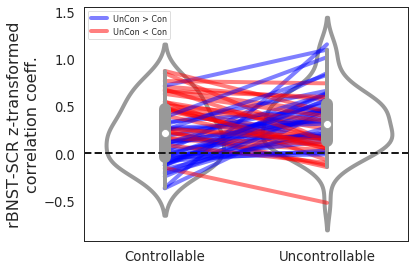

In [27]:
plt.figure(figsize=(6,4))
is_pos = []
for pair in df_for_paired_violin.index.unique():
    current_pair_df = df_for_paired_violin.loc[pair]
    if np.diff(current_pair_df['zcorr'][::-1])[0] > 0:
        color,label = 'blue','neg'
        is_pos.append(True)
    elif np.diff(current_pair_df['zcorr'][::-1])[0] < 0:
        color,label = 'red','pos'
        is_pos.append(False)
    else:
        color = 'purple'
    a = sns.lineplot(x='Group',y='zcorr',data=current_pair_df,label=label,legend=False,color=color,linewidth=4,alpha=0.5)
    
    
handels = np.array(a.get_legend_handles_labels()[0])
labels =np.array(a.get_legend_handles_labels()[1])
pos_handel = handels[labels=='pos'][0]
neg_handel = handels[labels=='neg'][0]

sns.violinplot(x='Group',y='zcorr',data=df_for_paired_violin,
               color='white',saturation=0.25,
               order=['Controllable','Uncontrollable'],linewidth=4)
plt.axhline(y=0,linewidth=2,linestyle='--',color='k')
#plt.xlabel('Group',fontdict={'size':16,'weight':500})
plt.xlabel('')
plt.legend([neg_handel,pos_handel],['UnCon > Con','UnCon < Con'],loc='upper left',fontsize=8)
plt.ylabel('rBNST-SCR z-transformed\ncorrelation coeff.',fontdict={'size':16,'weight':500})
plt.tight_layout()
plt.savefig('rBNST-SCR_corr.png',dpi=300)

## **Distribution of the z-transformed SCR-rBNST correlation values z(r)**
### **Paired Sample Test**

$$H_{0}: \mu_{z(r)_{runcontrol-control}}=0$$

In [28]:
def rel_samp_perm_test(samp,n_perms):
    n, k, samp_dist = len(samp), 0, []
    alt_obs = abs(np.mean(samp))
    for j in range(n_perms):
        null_obs = np.mean([val*np.random.choice([-1,1]) for val in samp])
        samp_dist.append(null_obs)
        k += abs(null_obs) > alt_obs
        
    return(samp_dist,(k+1)/(n_perms+1))

In [29]:
print('Paired Samples T-test p-value: %.3f' %(ttest_1samp(rba_df[rba_df['ROI']=='rBNST'].Y.values,0)[1]))
samp_dist, p_val = rel_samp_perm_test(rba_df[rba_df['ROI']=='rBNST'].Y.values,50000)
print('Paired Samples permutation test p-value: %.3f' %(p_val))

Paired Samples T-test p-value: 0.058
Paired Samples permutation test p-value: 0.057


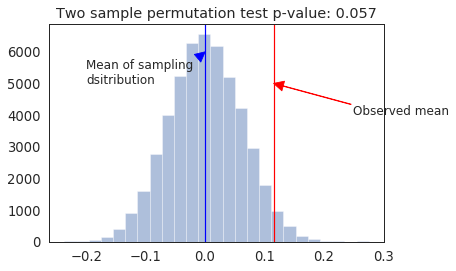

In [30]:
_=plt.hist(samp_dist,bins=25,alpha=0.45)
plt.axvline(x=np.mean(rba_df[rba_df['ROI']=='rBNST'].Y.values),c='red',label='Observed mean')
plt.axvline(x=np.mean(samp_dist),c='blue',label='Mean of \nsampling dsitribution')
plt.annotate('Observed mean',
             xy=(np.mean(rba_df[rba_df['ROI']=='rBNST'].Y.values),5000),
             xytext=(0.25,4000), arrowprops={'color':'red','width':0.5,
                                              'headwidth':10,
                                              'headlength':10},
             fontsize=12)
_=plt.annotate('Mean of sampling \ndsitribution',
             xy=(np.mean(samp_dist),6000),
             xytext=(-0.2,5000), arrowprops={'color':'blue','width':0.5,
                                              'headwidth':10,
                                              'headlength':10},
             fontsize=12)
_=plt.title('Two sample permutation test p-value: %.3f' %(p_val))

## Get the STAI scores to be used as covariates

In [29]:
scores = pd.read_excel(join(eCON,'STAIscores/scores.xlsx'))
scores.rename(columns={'SCORING':'TRAIT'},inplace=True)
scores.drop(columns=['PAIR SCORE'],inplace=True)
scores['SubID'] = scores['SubID'].apply(lambda name: ''.join(name.strip().split("_")))
print(scores.head())
print(scores.tail())

    SubID    Group  TRAIT  STATE
0  CON001  control     27     24
1  CON002  control     27     26
2  CON003  control     36     26
3  CON004  control     21     21
4  CON005  control     33     26
      SubID      Group  TRAIT  STATE
121  CON119  uncontrol     38     30
122  CON120  uncontrol     35     35
123  CON121  uncontrol     53     55
124  CON123  uncontrol     30     23
125  CON125  uncontrol     38     30


In [30]:
new_score_df = pd.DataFrame()
for i,row in yoked.iterrows():
    conTrait = scores[scores['SubID'] == row['control']]['TRAIT'].values[0]
    unconTrait = scores[scores['SubID'] == row['uncontrol']]['TRAIT'].values[0]
    
    conState = scores[scores['SubID'] == row['control']]['STATE'].values[0]
    unconState = scores[scores['SubID'] == row['uncontrol']]['STATE'].values[0]
    
    tmp_df = pd.DataFrame(['P{:02d}'.format(i),row['uncontrol'],row['control'],
                           unconTrait,conTrait,unconTrait-conTrait,np.mean([unconTrait,conTrait]),
                           unconState,conState,unconState-conState,np.mean([unconState,conState])],
                          index=['Pair',('SubID','uncontrol'),('SubID','control'),
                                  ('TRAIT','uncontrol'),('TRAIT','control'),('TRAIT','uncon-con'),('TRAIT','mean'),
                                  ('STATE','uncontrol'),('STATE','control'),('STATE','uncon-con'),('STATE','mean')]).T
    
    new_score_df = pd.concat([new_score_df,tmp_df],axis=0)
    
new_score_df.set_index('Pair',inplace=True)


new_score_df.columns = pd.MultiIndex.from_tuples(new_score_df.columns)

In [31]:
print(new_score_df.head())
print(new_score_df.tail())

         SubID             TRAIT                             STATE          \
     uncontrol control uncontrol control uncon-con  mean uncontrol control   
Pair                                                                         
P00     CON031  CON001        27      27         0    27        22      24   
P01     CON021  CON002        36      27         9  31.5        30      26   
P02     CON022  CON003        37      36         1  36.5        29      26   
P03     CON030  CON004        24      21         3  22.5        20      21   
P04     CON023  CON005        33      33         0    33        32      26   

                      
     uncon-con  mean  
Pair                  
P00         -2    23  
P01          4    28  
P02          3  27.5  
P03         -1  20.5  
P04          6    29  
         SubID             TRAIT                             STATE          \
     uncontrol control uncontrol control uncon-con  mean uncontrol control   
Pair                               

## Normalize the STAI score

In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scores_norm = pd.DataFrame(ss.fit_transform(new_score_df[[('STATE', 'mean'),('STATE','uncon-con'),('TRAIT', 'mean'),('TRAIT','uncon-con')]]),
                          columns=['STATEmean','STATEdiff','TRAITmean','TRAITdiff'],index=new_score_df.index)


In [33]:
scores_norm.head()

,STATEmean,STATEdiff,TRAITmean,TRAITdiff
Pair,,,,
P00,-1.213278,-0.144191,-0.988402,-0.055850
P01,-0.419284,0.496243,-0.407588,3.127601
P02,-0.498684,0.389504,0.237760,0.297867
P03,-1.610275,-0.037452,-1.569215,1.005300
P04,-0.260486,0.709720,-0.213984,-0.055850
